<a href="https://colab.research.google.com/github/YashDeshpande1771/Review-Summarization/blob/master/Feature_extraction_using_sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving feature_reviews.csv to feature_reviews.csv
User uploaded file "feature_reviews.csv" with length 43348 bytes


In [0]:
import pandas as pd

import numpy as np

data = pd.read_csv("feature_reviews.csv", encoding="latin1")

In [0]:
data = data.fillna(method="ffill")

In [0]:
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,After,IN,O
1,Sentence: 1,losing,VBG,O
2,Sentence: 1,my,PRP$,O
3,Sentence: 1,iPhone7,NN,F
4,Sentence: 1,"EarPods,",NNP,O
5,Sentence: 1,I,PRP,O
6,Sentence: 1,bought,VBD,O
7,Sentence: 1,these,DT,O
8,Sentence: 1,replacements---crossing,JJ,O
9,Sentence: 1,my,PRP$,O


In [0]:
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,After,IN,O
1,Sentence: 1,losing,VBG,O
2,Sentence: 1,my,PRP$,O
3,Sentence: 1,iPhone7,NN,F
4,Sentence: 1,"EarPods,",NNP,O
5,Sentence: 1,I,PRP,O
6,Sentence: 1,bought,VBD,O
7,Sentence: 1,these,DT,O
8,Sentence: 1,replacements---crossing,JJ,O
9,Sentence: 1,my,PRP$,O


In [0]:
words = list(set(data["Word"].values))
words.append("ENDPAD")

In [0]:
n_words = len(words); n_words

1065

In [0]:
tags = list(set(data["Tag"].values))
tags

['O', 'F']

In [0]:
n_tags = len(tags); n_tags

2

In [0]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:
getter = SentenceGetter(data)

In [0]:
sent = getter.get_next()

In [0]:
print(sent)

[('After', 'IN', 'O'), ('losing', 'VBG', 'O'), ('my', 'PRP$', 'O'), ('iPhone7', 'NN', 'F'), ('EarPods,', 'NNP', 'O'), ('I', 'PRP', 'O'), ('bought', 'VBD', 'O'), ('these', 'DT', 'O'), ('replacements---crossing', 'JJ', 'O'), ('my', 'PRP$', 'O'), ('fingers', 'NNS', 'O'), ('that', 'IN', 'O'), ('these', 'DT', 'O'), ('would', 'MD', 'O'), ('be', 'VB', 'O'), ('legit', 'JJ', 'O'), ('Apple', 'NNP', 'O'), ('products', 'NNS', 'O'), ('(my', 'JJ', 'O'), ('order', 'NN', 'O'), ('was', 'VBD', 'O'), ('"Sold', 'VBN', 'O'), ('by', 'IN', 'O'), ('Amazon"', 'NNP', 'O'), ('new', 'JJ', 'O'), ('as', 'IN', 'O'), ('a', 'DT', 'O'), ('Prime', 'NNP', 'O'), ('Exclusive)', 'NNP', 'O')]


In [0]:
sentences = getter.sentences
sentences

[[('After', 'IN', 'O'),
  ('losing', 'VBG', 'O'),
  ('my', 'PRP$', 'O'),
  ('iPhone7', 'NN', 'F'),
  ('EarPods,', 'NNP', 'O'),
  ('I', 'PRP', 'O'),
  ('bought', 'VBD', 'O'),
  ('these', 'DT', 'O'),
  ('replacements---crossing', 'JJ', 'O'),
  ('my', 'PRP$', 'O'),
  ('fingers', 'NNS', 'O'),
  ('that', 'IN', 'O'),
  ('these', 'DT', 'O'),
  ('would', 'MD', 'O'),
  ('be', 'VB', 'O'),
  ('legit', 'JJ', 'O'),
  ('Apple', 'NNP', 'O'),
  ('products', 'NNS', 'O'),
  ('(my', 'JJ', 'O'),
  ('order', 'NN', 'O'),
  ('was', 'VBD', 'O'),
  ('"Sold', 'VBN', 'O'),
  ('by', 'IN', 'O'),
  ('Amazon"', 'NNP', 'O'),
  ('new', 'JJ', 'O'),
  ('as', 'IN', 'O'),
  ('a', 'DT', 'O'),
  ('Prime', 'NNP', 'O'),
  ('Exclusive)', 'NNP', 'O')],
 [('Head', 'NN', 'O'),
  ('to', 'TO', 'O'),
  ('the', 'DT', 'O'),
  ('Apple', 'NNP', 'O'),
  ('Store', 'NNP', 'O'),
  ('otherwise!', 'IN', 'O'),
  ('I', 'PRP', 'O'),
  ('use', 'VBP', 'O'),
  ('my', 'PRP$', 'O'),
  ('earbuds', 'NN', 'F'),
  ('for', 'IN', 'O'),
  ('singing', 'VBG',

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

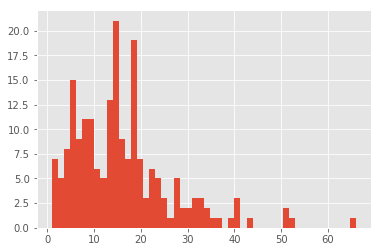

In [0]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [0]:
max_len = 50
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}


In [0]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)

Using TensorFlow backend.


In [0]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [0]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [0]:
from keras.utils import to_categorical

In [0]:
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [0]:
y

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1.,

In [0]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [0]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(input) # replace 50 by 2
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)  # softmax output layer

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model = Model(input, out)

In [0]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [0]:
history = model.fit(X_tr, np.array(y_tr), batch_size=1, epochs=5, validation_split=0.1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 161 samples, validate on 18 samples
Epoch 1/5
161/161 [==============================] - 9s 59ms/step - loss: 0.0677 - acc: 0.9822 - val_loss: 0.0541 - val_acc: 0.9878
Epoch 2/5
161/161 [==============================] - 8s 48ms/step - loss: 0.0444 - acc: 0.9880 - val_loss: 0.0463 - val_acc: 0.9878
Epoch 3/5
161/161 [==============================] - 8s 49ms/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.0430 - val_acc: 0.9878
Epoch 4/5
161/161 [==============================] - 8s 48ms/step - loss: 0.0167 - acc: 0.9944 - val_loss: 0.0300 - val_acc: 0.9944
Epoch 5/5
161/161 [==============================] - 8s 47ms/step - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0306 - val_acc: 0.9944


In [0]:
i = 3
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
for w, pred in zip(X_te[i], p[0]):
    print("{:15}: {}".format(words[w], tags[pred]))

Word            (True ): Pred
waste          : O
of             : O
money!         : O
These          : O
looked         : O
like           : O
OEM            : O
headphones     : F
and            : O
came           : O
packaged       : O
as             : O
new            : O
however        : O
after          : O
two            : O
songs          : O
they           : O
quit           : O
working        : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
ENDPAD         : O
